#  Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
hrt = pd.read_csv("heart.csv")

In [4]:
hrt.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
hrt.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
hrt = hrt.dropna()  # Dropping null values

In [7]:
# Descriptive statistics for fasting blood sugar > 120 mg/dl
fbs_stats = hrt['fbs'].describe()

In [8]:
# Descriptive statistics for serum cholestoral in mg/dl
chol_stats = hrt['chol'].describe()

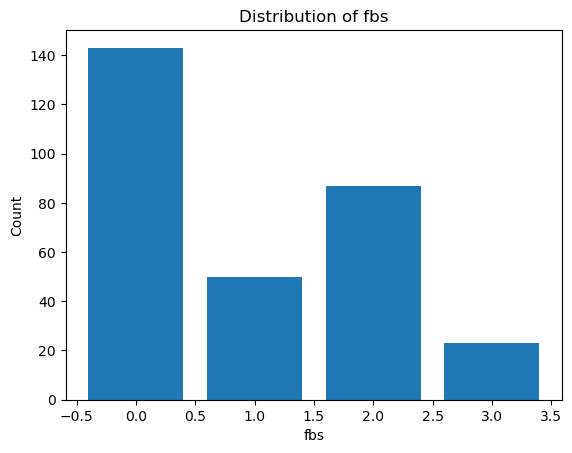

In [9]:
# Bar plot for the 'fbs' column
marital_counts = hrt['cp'].value_counts()
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel('fbs')
plt.ylabel('Count')
plt.title('Distribution of fbs')
plt.show()

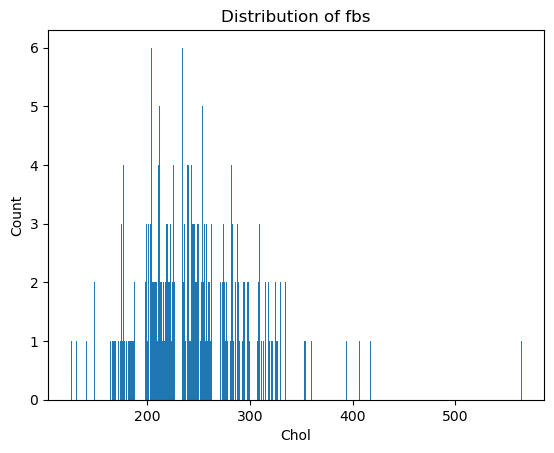

In [10]:
# Bar plot for the 'Chol' column
marital_counts = hrt['chol'].value_counts()
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel('Chol')
plt.ylabel('Count')
plt.title('Distribution of fbs')
plt.show()

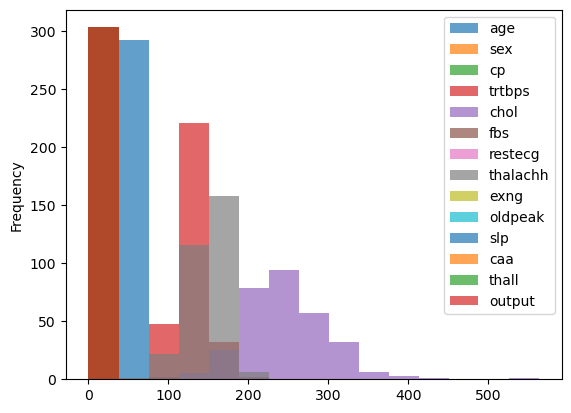

In [11]:
plot2=hrt.plot.hist(bins=15,alpha=0.7)
plot2;

In [12]:
# Mean, standard deviation, and correlation between 'resting electrocardiographic results (values 0,1,2)' and 'ST depression induced by exercise relative to rest'
restecg_mean = hrt['restecg'].mean()
restecg_std = hrt['restecg'].std()
restecg_oldpeak_corr = hrt[['restecg', 'oldpeak']].corr()

print("Mean restecg:", restecg_mean)
print("Standard deviation of oldpeak:", restecg_std)
print("Correlation between age and oldpeak:\n", restecg_oldpeak_corr)

age_mean = hrt['age'].mean()
age_std = hrt['age'].std()
age_slp_corr = hrt[['age', 'slp']].corr()

print("Mean Age:", age_mean)
print("Standard deviation of slp:", age_std)
print("Correlation between age and slp:\n", age_slp_corr)

Mean restecg: 0.528052805280528
Standard deviation of oldpeak: 0.525859596359298
Correlation between age and oldpeak:
          restecg  oldpeak
restecg  1.00000 -0.05877
oldpeak -0.05877  1.00000
Mean Age: 54.366336633663366
Standard deviation of slp: 9.082100989837858
Correlation between age and slp:
           age       slp
age  1.000000 -0.168814
slp -0.168814  1.000000


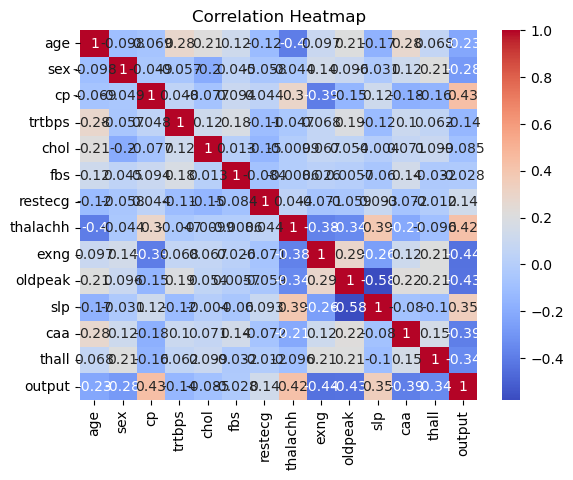

In [13]:
# Correlation Heatmap:
correlation_matrix = hrt.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

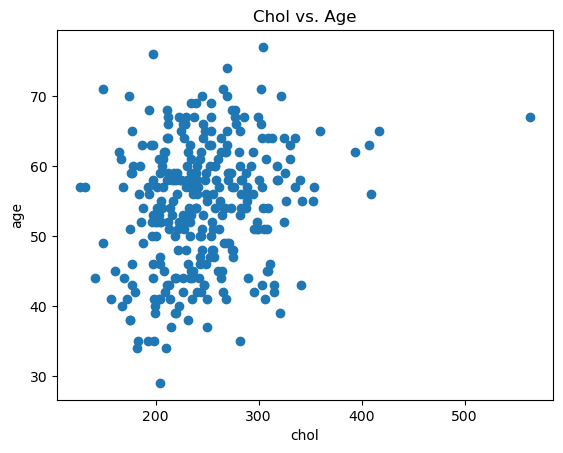

In [14]:
# Scatter plot of Chol vs. Age
plt.scatter(hrt['chol'], hrt['age'])
plt.xlabel('chol')
plt.ylabel('age')
plt.title('Chol vs. Age')
plt.show()


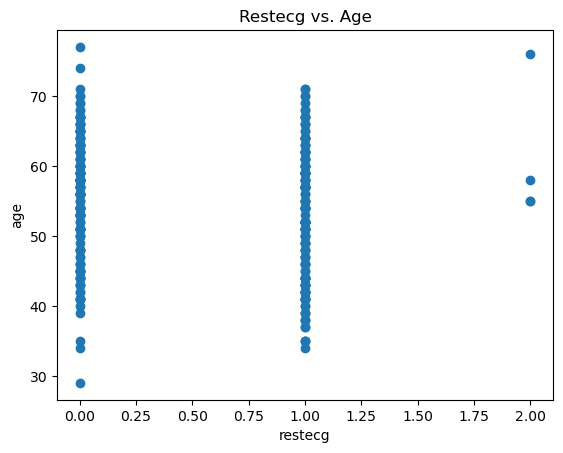

In [15]:
# Scatter plot of Age vs. Restecg
plt.scatter(hrt['restecg'], hrt['age'])
plt.xlabel('restecg')
plt.ylabel('age')
plt.title('Restecg vs. Age')
plt.show()

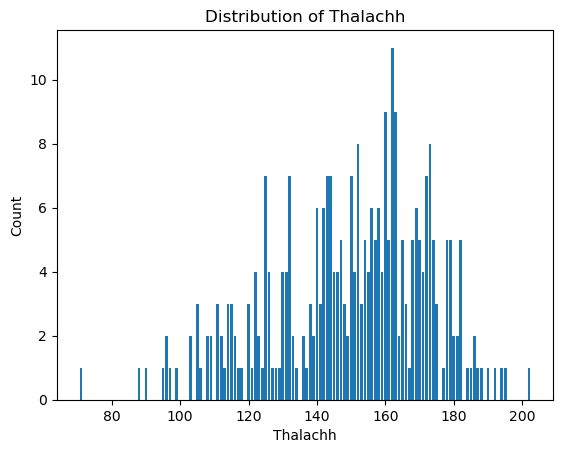

In [16]:
# Bar plot of thalachh
education_counts = hrt['thalachh'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Thalachh')
plt.ylabel('Count')
plt.title('Distribution of Thalachh')
plt.show()

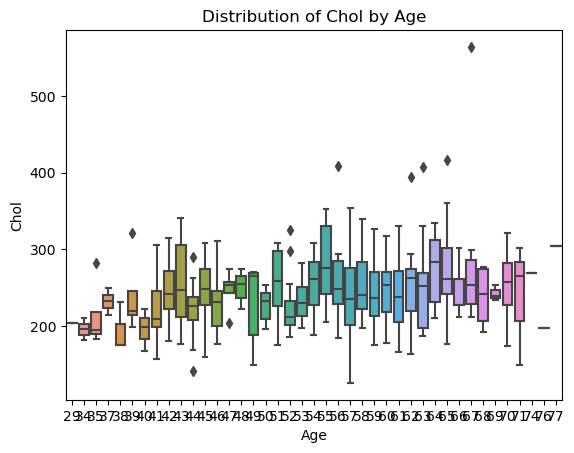

In [17]:
# Boxplot of Age by Chol
sns.boxplot(x=hrt['age'], y=hrt['chol'])
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('Distribution of Chol by Age')
plt.show()

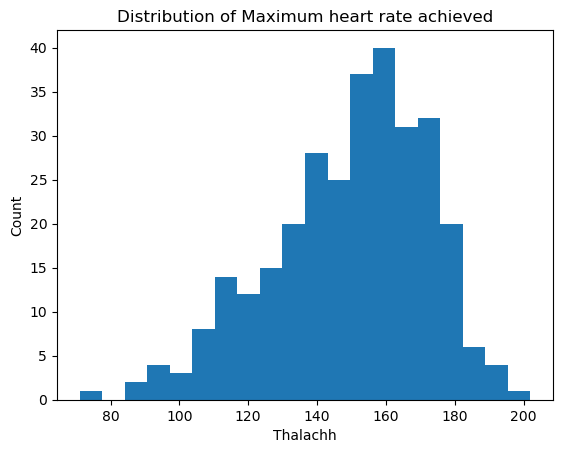

In [18]:
# Histogram of maximum heart rate achieved
plt.hist(hrt['thalachh'], bins=20)
plt.xlabel('Thalachh')
plt.ylabel('Count')
plt.title('Distribution of Maximum heart rate achieved')
plt.show()

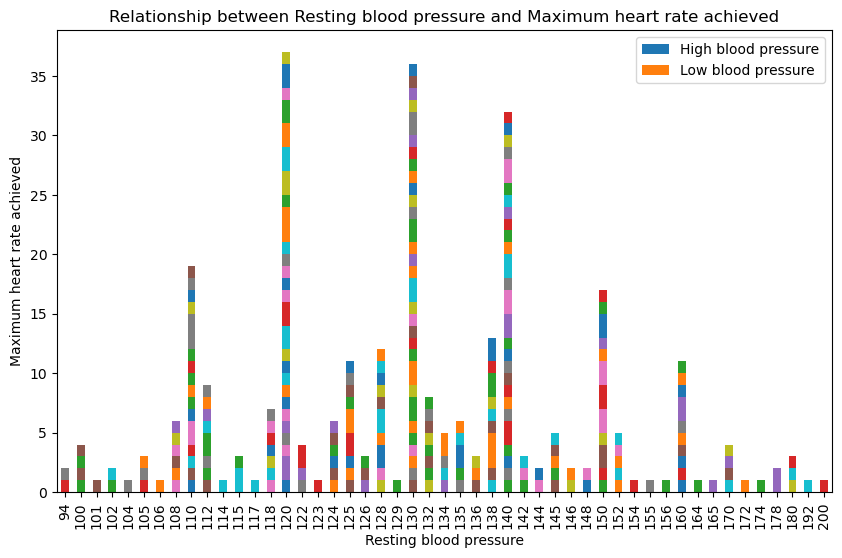

In [19]:
job_deposit_counts = hrt.groupby(['trtbps', 'thalachh']).size().unstack()
job_deposit_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Resting blood pressure')
plt.ylabel('Maximum heart rate achieved')
plt.title('Relationship between Resting blood pressure and Maximum heart rate achieved')
plt.legend(['High blood pressure', 'Low blood pressure'])
plt.show()

In [20]:
hrt.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Converting categorical data into integer data

In [22]:
hrt1 = hrt.apply(lambda x: pd.factorize(x)[0])

In [23]:
hrt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slp       303 non-null    int64
 11  caa       303 non-null    int64
 12  thall     303 non-null    int64
 13  output    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


# Test and Train

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
hrt1['chol'] = hrt1['chol'].astype('category')

In [26]:
x = hrt1.drop('chol', axis=1)
y = hrt1['chol']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [28]:
print(len(x_train))
print(len(x_test))

242
61


In [29]:
print(len(y_train))
print(len(y_test))

242
61


In [30]:
X_train=x_train
X_test=x_test
Y_train=y_train
Y_test=y_test

# Confusion matrix generation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Decision tree classifier 

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [33]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [34]:
Y_pred_DT = DT.predict(X_test)

In [35]:
accuracy_score(Y_pred_DT,Y_test)

0.03278688524590164

Confusion matrix for Decision Tree

In [36]:
confusion_matrix(Y_pred_DT, Y_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
dtc_auc=accuracy_score(Y_pred_DT,Y_test)
print("Accuracy of DT model:", dtc_auc)

Accuracy of DT model: 0.03278688524590164


In [38]:
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       1.00    

# Linear Regression

In [39]:
X_train=x_train
X_test=x_test
Y_train=y_train
Y_test=y_test

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
#fitting model
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)
model_1.score(X_train, Y_train)

0.2607136750657123

In [42]:
Y_pred = model_1.predict(X_test)

In [43]:
print("Parameters:", model_1.coef_, model_1.intercept_)
print("Coefficient:", model_1.coef_[0])
print("Intercept:", model_1.intercept_)

Parameters: [ 1.23181873e-01  3.70703657e+00  2.72510819e+00  5.72834547e-01
 -1.17989843e+00 -3.28765974e+00  1.64911666e-02 -6.75571407e-02
  1.91003811e-01  2.77404165e-01 -3.06335836e+00 -7.41380174e-01
  3.69948256e+01] 33.93727419759897
Coefficient: 0.12318187254129434
Intercept: 33.93727419759897


# KNN

In [44]:
X_train=x_train
X_test=x_test
Y_train=y_train
Y_test=y_test

In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [46]:
KNN.fit(X_test, Y_test)

KNeighborsClassifier()

In [47]:
hrt1 = np.array(hrt1, dtype=np.float32)

In [48]:
Y_pred_KNN = KNN.predict(X_test)

In [49]:
confusion_matrix(Y_test, Y_pred_KNN)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
KNN_auc=accuracy_score(Y_test,Y_pred_KNN)
print("Accuracy of KNN model:", KNN_auc)

Accuracy of KNN model: 0.19672131147540983


In [51]:
print(classification_report(Y_test, Y_pred_KNN))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.33      1.00      0.50         1
           3       0.12      1.00      0.22         1
           4       0.00      0.00      0.00         1
           5       0.17      1.00      0.29         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.25      1.00      0.40         1
          16       0.00      0.00      0.00         1
          17       0.20      1.00      0.33         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          39       0.25      1.00      0.40         1
          42       0.25    

In [52]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 95}
Best score: 0.028858024691358022


In [53]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
prediction = knn.predict(X_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

Prediction: [ 44   5   3  13  25  69  25   3  13   3  13  22  72   7  77   6  58  10
  13  74  10 120  17   0  66  23  10  47  24   7  58  10  27  45  80  19
  64  23   9  19   0  35   7  82  25  25   2   3  51  17  32  17  26  19
  32  10   1  22  13  25  52]
With KNN (K=3) accuracy is:  0.04918032786885246


In [54]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.15877371051470002


In [55]:
# Lasso
from sklearn.linear_model import Lasso
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.009307456522805624
Lasso coefficients:  [-0.          0.          0.32876937  0.40976284  0.97417038 -3.37878249
  0.         -0.          0.45699096  1.22391765  0.87762528 -0.
 38.09935661]


# Random Forest

In [56]:
X_train=x_train
X_test=x_test
Y_train=y_train
Y_test=y_test

In [57]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=40)

In [58]:
RF.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=40)

In [59]:
Y_pred = RF.predict(X_test)

In [60]:
confusion_matrix(Y_test, Y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
RF_auc=accuracy_score(Y_pred,Y_test)
print("Accuracy of RF model:", RF_auc)

Accuracy of RF model: 0.0


In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))